# Visualization

### Bibliothken laden

In [1]:
%reload_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

import data_handler

### Daten laden

In [2]:
# measurement_frame = dataloader.from_db_to_csv()
measurement_frame = data_handler.from_csv()

In [3]:
measurement_frame.head()

,alpha,beta,gamma,label,subject
time,,,,,
2019-09-28 20:04:28.036647800+00:00,77768,18301,2780,Standing,standing1
2019-09-28 20:04:28.037515800+00:00,88605,21649,4035,Standing,standing1
2019-09-28 20:04:28.106571600+00:00,88453,22392,4690,Standing,standing1
2019-09-28 20:04:28.107079600+00:00,88438,22857,5127,Standing,standing1
2019-09-28 20:04:28.154475200+00:00,88550,23295,5497,Standing,standing1


### Windowing und Feature-Berechnung

In [4]:
aggregated_frame = data_handler.aggregate(measurement_frame)

### Boxplots

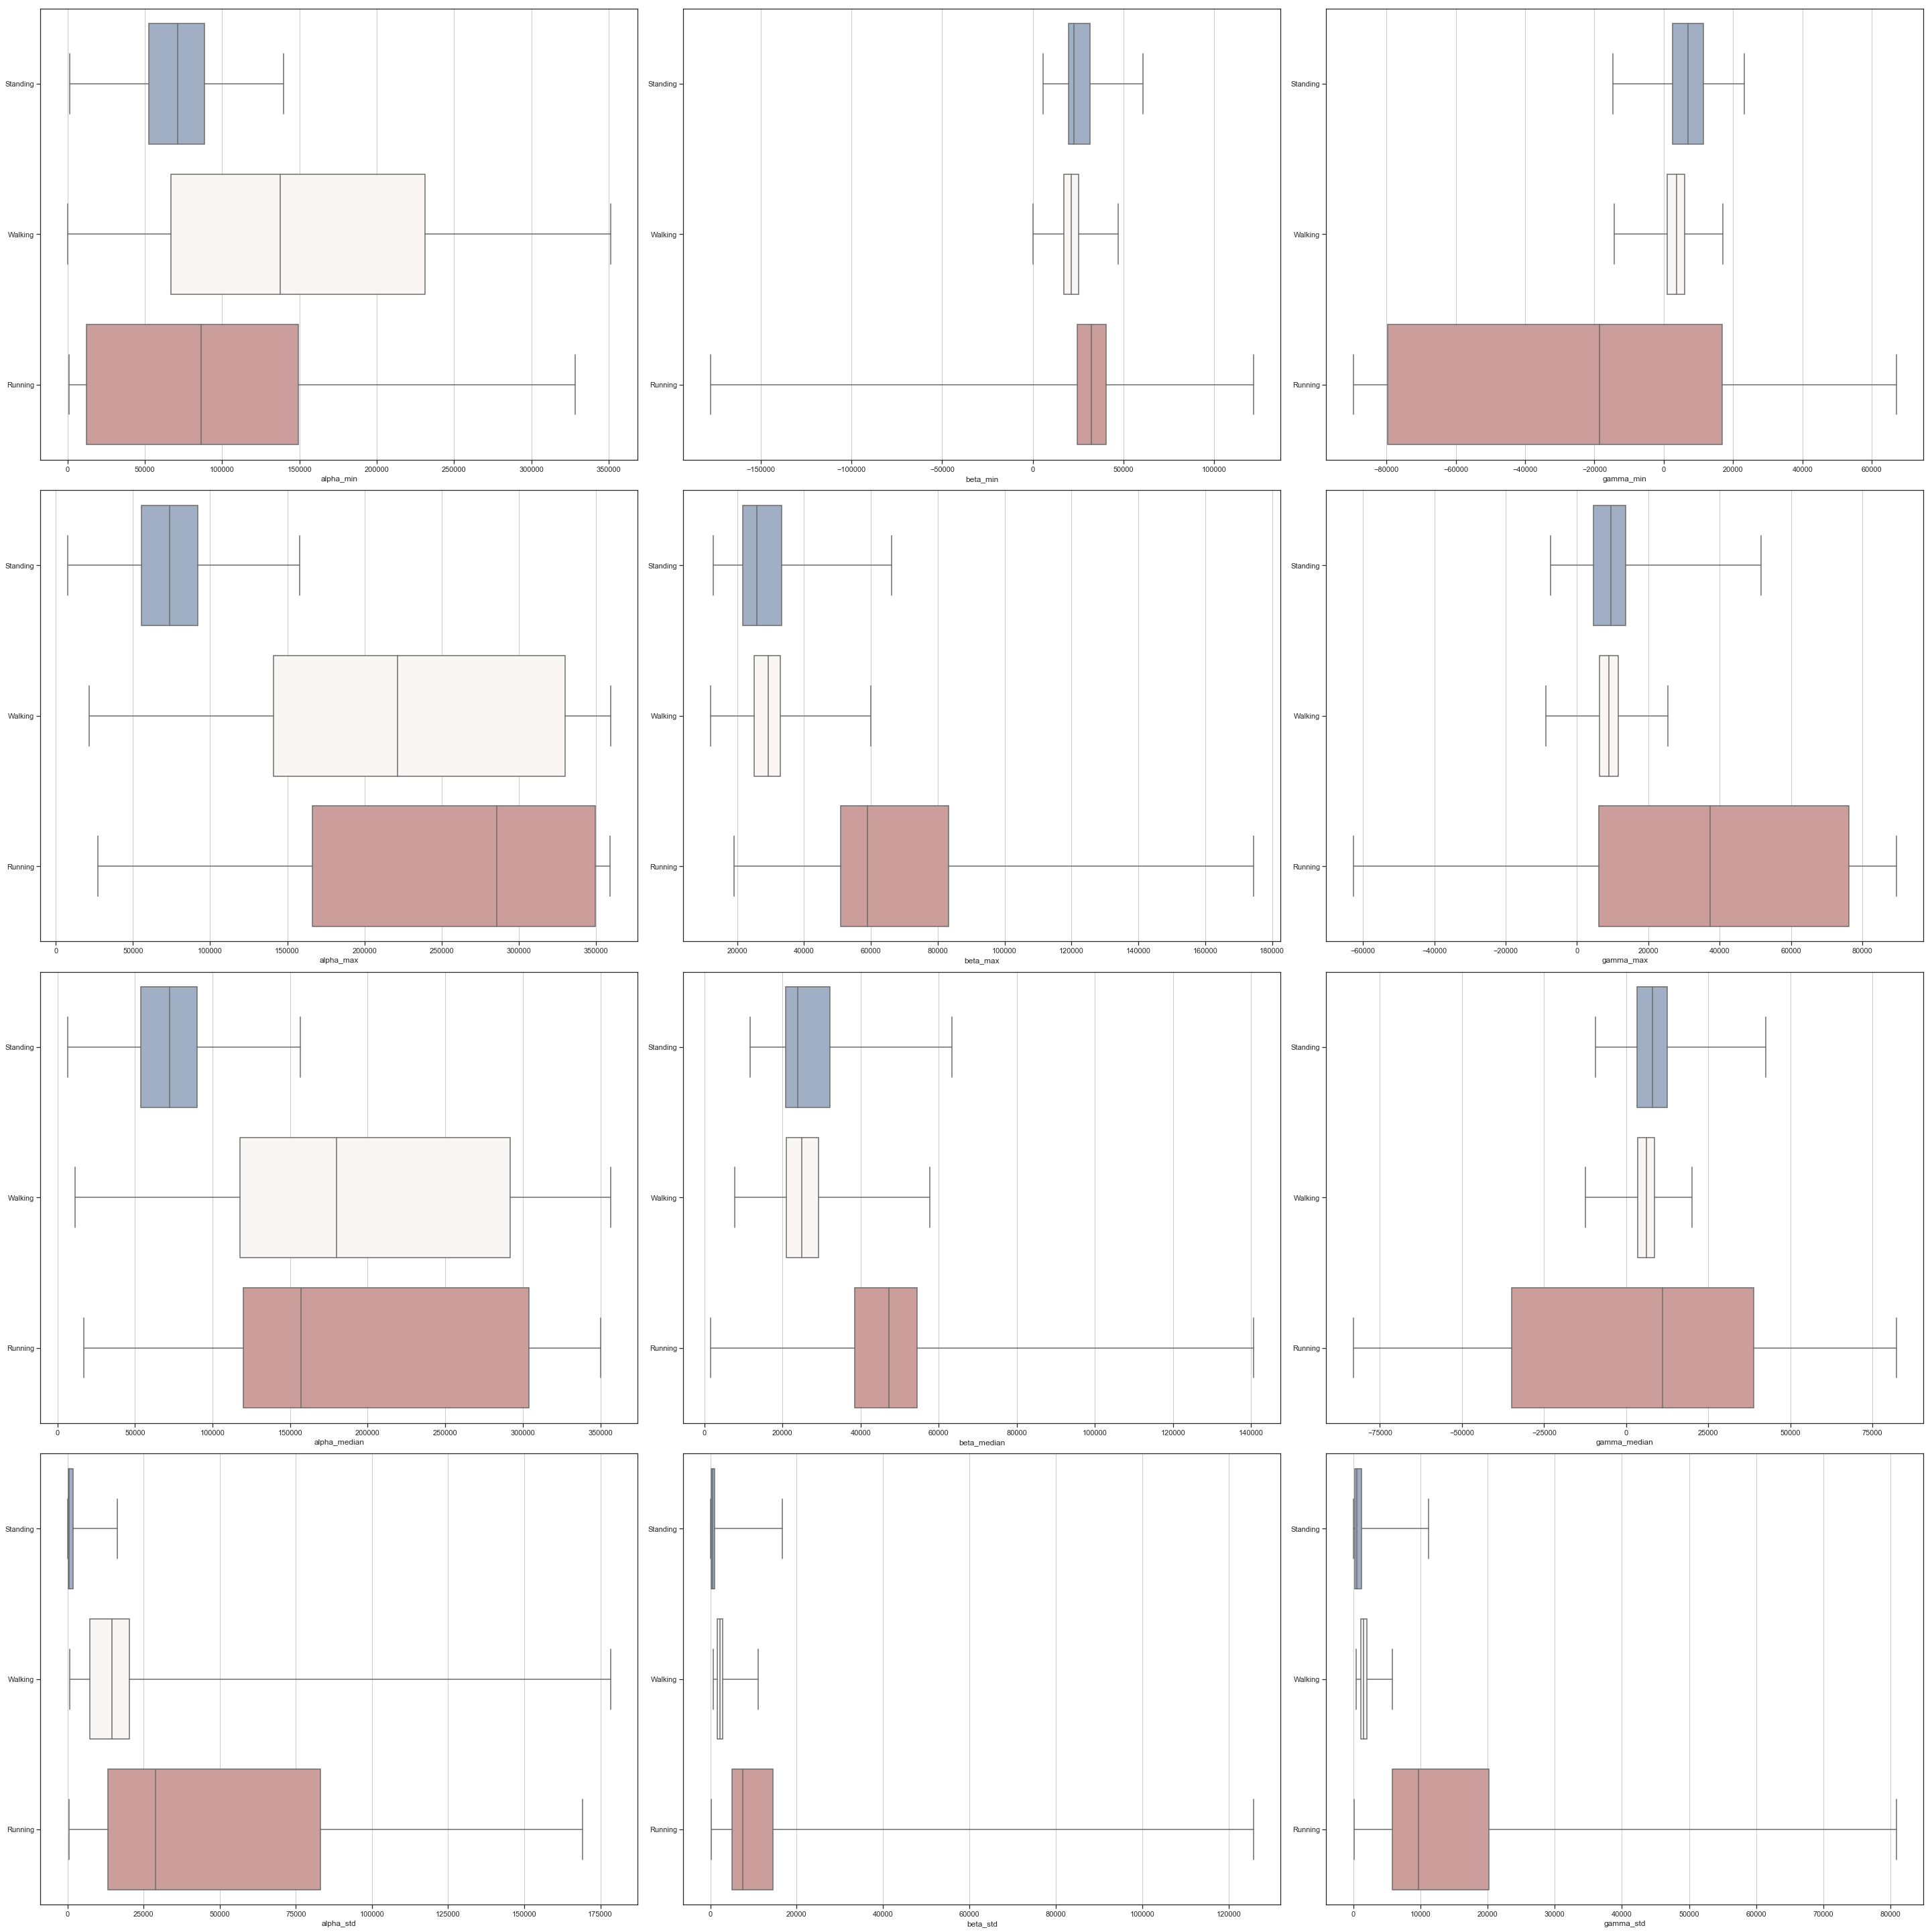

In [5]:
sns.set(style="ticks")
aggregate_columns = aggregated_frame.columns[:-2]
aggregates = ['min', 'max', 'median', 'std']
num_aggregates = len(aggregates)
f, ax = plt.subplots(num_aggregates, int(len(aggregate_columns)/num_aggregates),figsize=(40, 40))
for idx, column in enumerate(aggregate_columns):
    this_ax = ax[idx % num_aggregates,int(idx/num_aggregates)]
    
    # Plot the orbital period with horizontal boxes
    sns.boxplot(x=column, y="label", data=aggregated_frame,
                whis="range", palette="vlag", ax=this_ax)
    
    # Tweak the visual presentation
    this_ax.xaxis.grid(True)
    this_ax.set(ylabel="")
plt.tight_layout(0.5)

### Paarweise Relationen

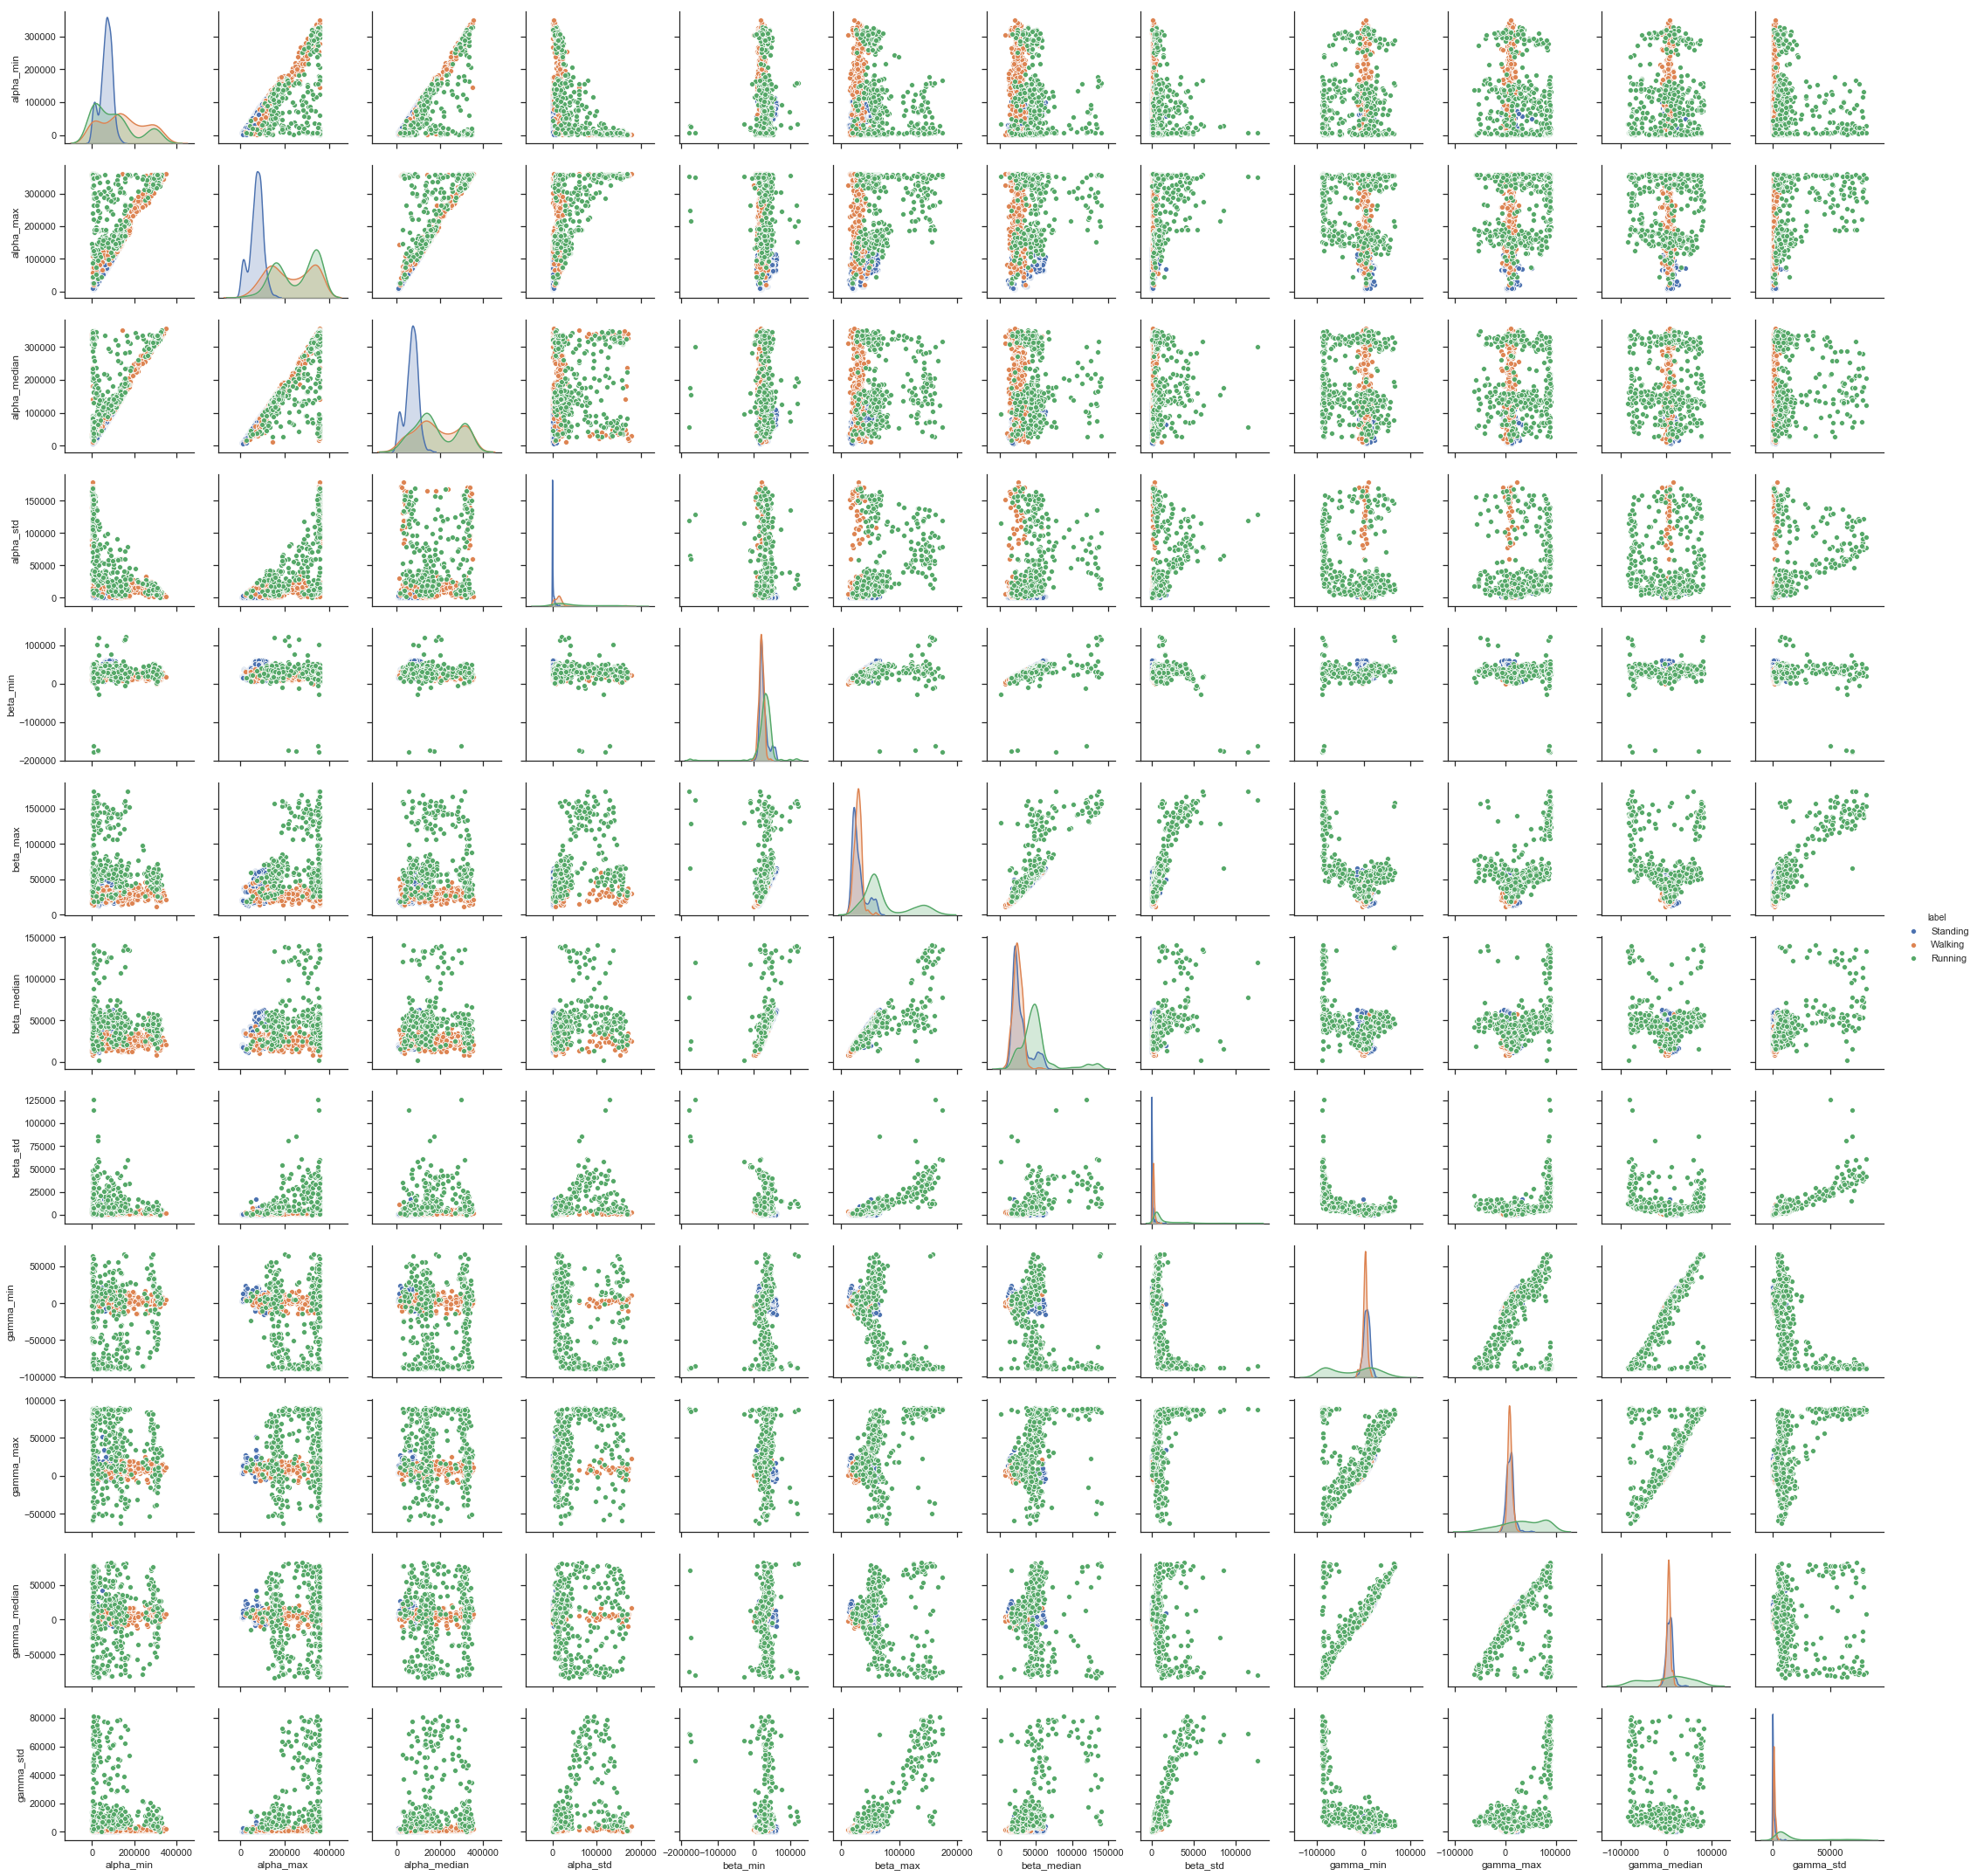

In [6]:
sns.pairplot(aggregated_frame, hue="label");

### TSNE Visualization

/Users/d065057/anaconda3/envs/css/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/d065057/anaconda3/envs/css/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


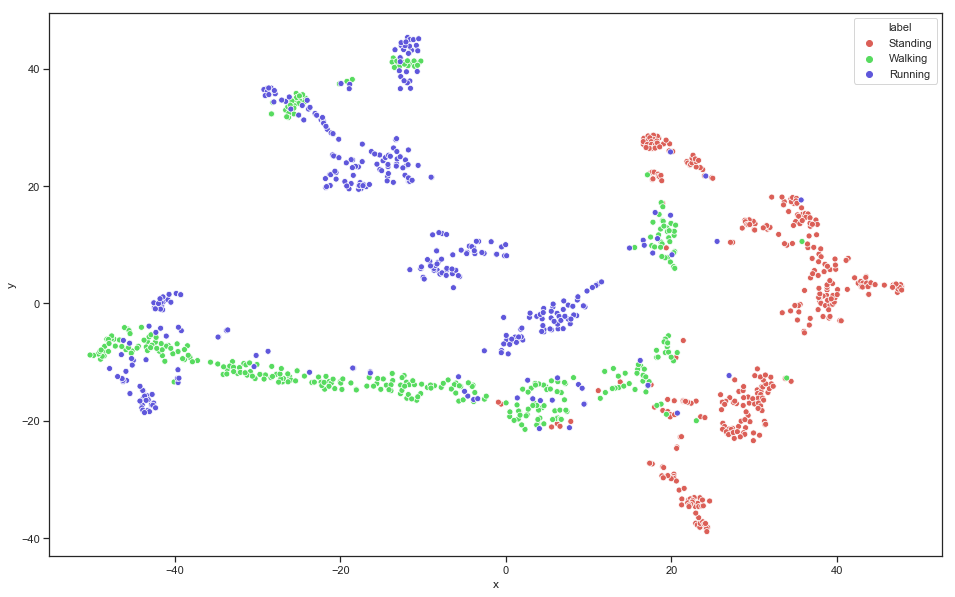

In [7]:
X = aggregated_frame.drop(['label','subject'], axis=1).to_numpy()
X_embedded = TSNE(n_components=2).fit_transform(X)
tsne = aggregated_frame[['label']]
tsne['x'] = X_embedded[:,0]
tsne['y'] = X_embedded[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="x", y="y",
    hue="label",
    palette=sns.color_palette("hls", 3),
    data=tsne,
    legend="full"
);